<a href="https://colab.research.google.com/github/Akalya11/AIML-TASKS/blob/main/Social%20Media%20Sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: Import Libraries and Download NLTK Resources
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

# Download necessary NLTK data (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
#Define Helper Functions (Text Cleaning and Sentiment Analysis)
def clean_text(text):
    """Cleans the text by removing URLs, mentions, hashtags, special characters, and converting to lowercase."""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

def analyze_sentiment(text):
    """Analyzes the sentiment of the text and returns 'Positive', 'Negative', or 'Neutral'."""
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [3]:
#Step 3: Load Data and Perform Initial Sentiment Analysis
# Example Data (Replace with your actual data)
data = {'text': [
    "I love this product, it's amazing!",
    "This is terrible, I hate it.",
    "It's okay, nothing special.",
    "The service was great, very helpful.",
    "I'm so disappointed, what a waste of money.",
    "It's alright, could be better.",
    "Absolutely fantastic!",
    "Worst experience ever.",
    "Meh, it's fine.",
    "This is the best thing I've ever used!",
    "I want my money back!",
    "Not bad, not great.",
    "Highly recommend!",
    "Avoid at all costs.",
    "Decent.",
    "Incredible!",
    "Completely useless.",
    "Average.",
    "Exceptional!",
    "Horrible!",
    "Good.",
    "Fantastic!",
    "Awful!",
    "Fair.",
    "Superb!",
    "Dreadful!",
    "Nice.",
    "Wonderful!",
    "Terrible!",
    "Okay.",
],
        'date': ['2025-05-01', '2025-05-01', '2025-05-01', '2025-05-02', '2025-05-02', '2025-05-02',
                 '2025-05-03', '2025-05-03', '2025-05-03', '2025-05-04', '2025-05-04', '2025-05-04',
                 '2025-05-05', '2025-05-05', '2025-05-05', '2025-05-06', '2025-05-06', '2025-05-06',
                 '2025-05-07', '2025-05-07', '2025-05-07', '2025-05-08', '2025-05-08', '2025-05-08',
                 '2025-05-09', '2025-05-09', '2025-05-09', '2025-05-09', '2025-05-09', '2025-05-09']
}

# Line-by-line processing:
# 1. Create a Pandas DataFrame from the 'data' dictionary.
df = pd.DataFrame(data)

# 2. Apply the 'clean_text' function to each 'text' entry and store the result in a new column 'cleaned_text'.
df['cleaned_text'] = df['text'].apply(clean_text)

# 3. Apply the 'analyze_sentiment' function to each 'cleaned_text' entry and store the result in a new column 'sentiment'.
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

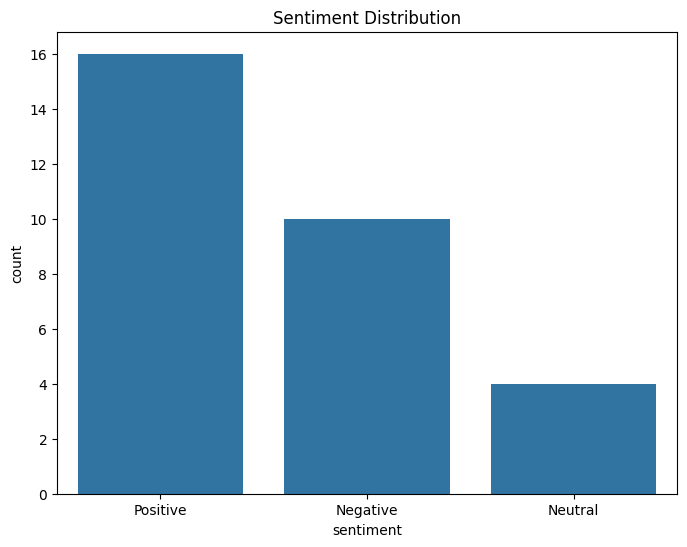

In [4]:
#Step 4: Display the Sentiment Distribution Bar Chart

# Sentiment Distribution Bar Chart
plt.figure(figsize=(8, 6))

# 1. Create a count plot using seaborn, with 'sentiment' on the x-axis and the DataFrame 'df' as the data source.
sns.countplot(x='sentiment', data=df)

# 2. Set the title of the plot.
plt.title('Sentiment Distribution')

# 3. Display the plot.
plt.show()

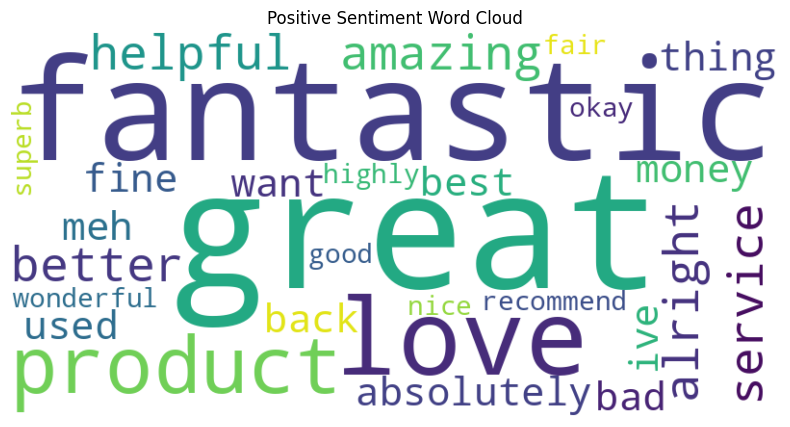

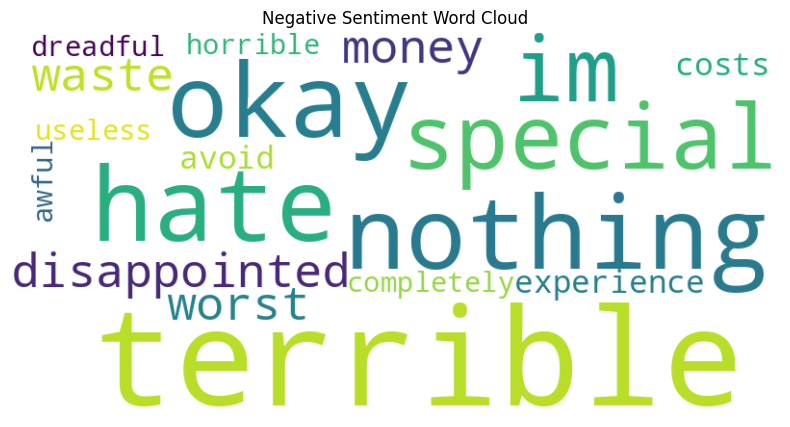

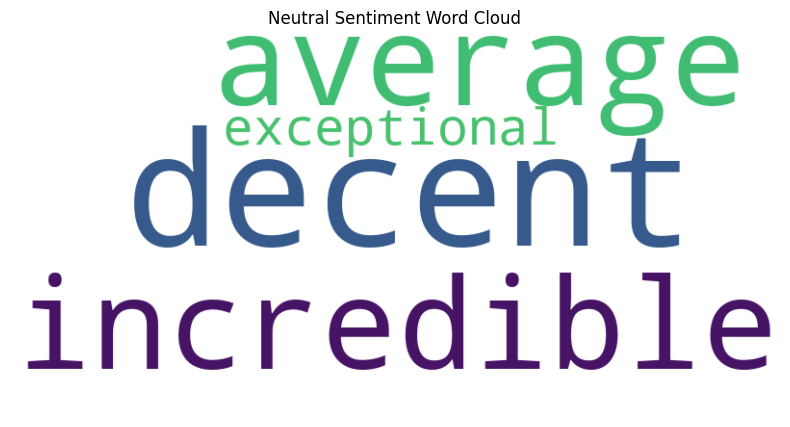

In [5]:
#Step 5: Display the Word Clouds for Each Sentiment

# Word Cloud for Positive Sentiment
# 1. Filter the DataFrame to get only the text with 'Positive' sentiment.
positive_text = df[df['sentiment'] == 'Positive']['cleaned_text']

# 2. Create a WordCloud object with specified parameters (width, height, background color).
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_text))

# 3. Create a new figure for the plot.
plt.figure(figsize=(10, 5))

# 4. Display the generated word cloud as an image.
plt.imshow(wordcloud_positive, interpolation='bilinear')

# 5. Remove axis ticks and labels.
plt.axis('off')

# 6. Set the title of the plot.
plt.title('Positive Sentiment Word Cloud')

# 7. Display the plot.
plt.show()

# Word Cloud for Negative Sentiment
negative_text = df[df['sentiment'] == 'Negative']['cleaned_text']
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

# Word Cloud for Neutral Sentiment
neutral_text = df[df['sentiment'] == 'Neutral']['cleaned_text']
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud')
plt.show()

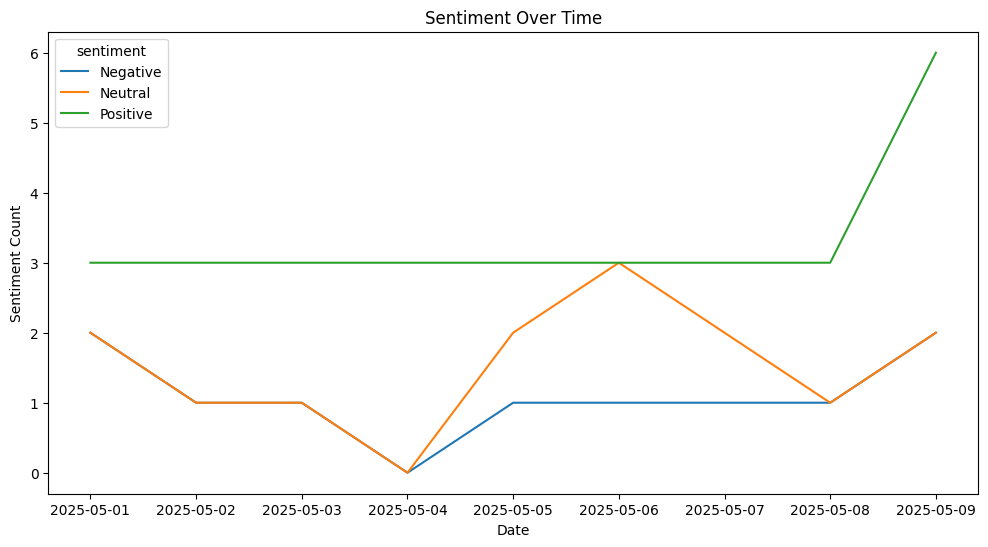

In [6]:
#Step 6: Display the Sentiment Over Time Line Chart (If 'date' column exists)

# Sentiment Over Time Line Chart
# 1. Check if a 'date' column exists in the DataFrame.
if 'date' in df.columns:

    # 2. Convert the 'date' column to datetime objects.
    df['date'] = pd.to_datetime(df['date'])

    # 3. Group the DataFrame by date and count the occurrences of each sentiment.
    sentiment_over_time = df.groupby(df['date'].dt.date)['sentiment'].value_counts().unstack().fillna(0)

    # 4. Create a line plot from the grouped data, with stacked lines for each sentiment.
    sentiment_over_time.plot(kind='line', stacked=True, figsize=(12, 6))

    # 5. Set the title of the plot.
    plt.title('Sentiment Over Time')

    # 6. Set the label for the x-axis.
    plt.xlabel('Date')

    # 7. Set the label for the y-axis.
    plt.ylabel('Sentiment Count')

    # 8. Display the plot.
    plt.show()
else:
    print("No 'date' column found in the DataFrame to generate the sentiment over time chart.")

In [7]:
#Step 7: Train and Display the Classification Report and Accuracy

# Train Sentiment Model and Display Classification Report
# 1. Initialize a TF-IDF vectorizer to convert text into numerical features.
vectorizer = TfidfVectorizer(max_features=5000)

# 2. Fit the vectorizer to the cleaned text data and transform it.
X = vectorizer.fit_transform(df['cleaned_text'])

# 3. Extract the sentiment labels.
y = df['sentiment']

# 4. Split the data into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize a Multinomial Naive Bayes classifier.
model = MultinomialNB()

# 6. Train the model using the training data.
model.fit(X_train, y_train)

# 7. Make predictions on the test data.
y_pred = model.predict(X_test)

# 8. Print the classification report, which includes precision, recall, F1-score for each sentiment.
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # Handles cases with no predicted samples

# 9. Print the overall accuracy of the model.
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         2
    Positive       0.60      0.75      0.67         4

    accuracy                           0.50         6
   macro avg       0.20      0.25      0.22         6
weighted avg       0.40      0.50      0.44         6


Accuracy: 0.5


In [8]:
#Step 8: Display the Top Words for Each Sentiment

# Display Top Words for Each Sentiment
def top_words(text_series, n=20):
    """Counts and returns the top n words in a text series."""
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

# 1. Filter the DataFrame to get cleaned text for each sentiment.
positive_text = df[df['sentiment'] == 'Positive']['cleaned_text']
negative_text = df[df['sentiment'] == 'Negative']['cleaned_text']
neutral_text = df[df['sentiment'] == 'Neutral']['cleaned_text']

# 2. Calculate and print the top 20 words for positive sentiment.
print("\nTop 20 words in Positive Sentiment:")
print(top_words(positive_text))

# 3. Calculate and print the top 20 words for negative sentiment.
print("\nTop 20 words in Negative Sentiment:")
print(top_words(negative_text))

# 4. Calculate and print the top 20 words for neutral sentiment.
print("\nTop 20 words in Neutral Sentiment:")
print(top_words(neutral_text))


Top 20 words in Positive Sentiment:
[('its', 3), ('i', 2), ('this', 2), ('the', 2), ('great', 2), ('fantastic', 2), ('not', 2), ('love', 1), ('product', 1), ('amazing', 1), ('service', 1), ('was', 1), ('very', 1), ('helpful', 1), ('alright', 1), ('could', 1), ('be', 1), ('better', 1), ('absolutely', 1), ('meh', 1)]

Top 20 words in Negative Sentiment:
[('terrible', 2), ('this', 1), ('is', 1), ('i', 1), ('hate', 1), ('it', 1), ('its', 1), ('okay', 1), ('nothing', 1), ('special', 1), ('im', 1), ('so', 1), ('disappointed', 1), ('what', 1), ('a', 1), ('waste', 1), ('of', 1), ('money', 1), ('worst', 1), ('experience', 1)]

Top 20 words in Neutral Sentiment:
[('decent', 1), ('incredible', 1), ('average', 1), ('exceptional', 1)]
